# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what? 

A model is linear in the parameters, meaning the prediction is a linear combination of the coefficients. It can include transformations of the input variables (like log, square), but the key is that the coefficients appear linearly in the equation. 

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) 

It depends on whether the model includes an intercept. If theres no intercept, each dummy variable's coefficient is just the mean of the outcome in that group. If there is an intercept, the coefficient tells you how much higher or lower that group's mean is compared to the base category.

3. Can linear regression be used for classification? Explain why, or why not. 

Linear regression can be used when the outcome is binary but it has limitations. The predicted values don't have to be between 0 and 1, and it doesn't model probabilities well. Logistic regression if preferred for binary outcomes.

4. What are signs that your linear model is over-fitting? 

Very high $R^2$ on the training data but low $R^2$ on the test set. Low training error but much higher test RMSE. Model includes too many polynominal terms or dummy variables relative to number of observations. 

5. Clearly explain multi-colinearity using the two-stage least squares technique. 

Multi-colinearity occurs when predictor variables are correlated with each other, making it difficult to isolate their individual effects. In two-stage least squares, we predict the problematic variable using variables not correlated with the error and regress the outcome on the predicted values from the first step. 

6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis? 

Even though linear models are linear in coefficients, you can include nonlinear transformations of X by using PolinomialFeatures, taking logs or arcsinh transformations, or including interaction terms. 

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable? 

Intercept: The expected value of y when all predictors are 0 or when all dummies are at their base category.
Slope coefficient: The change in y for a 1-unit increase in the variable, holding all else constant.
Dummy variable coefficient: If you've dropped a base category, then this coefficient tells you how much higher or lower that group's mean is compared to the base group.


**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [52]:
df = pd.read_csv('./data/Q1_clean.csv')
df.columns = df.columns.str.strip()
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

-   Manhattan is the most expensive bourough on average.

In [53]:
avg_table = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean().sort_values(by = 'Price', ascending = False)
print(avg_table)

                    Price  Review Scores Rating
Neighbourhood                                  
Manhattan      183.664286             91.801496
Staten Island  146.166667             90.843750
Brooklyn       127.747378             92.363497
Queens          96.857233             91.549057
Bronx           75.276498             91.654378


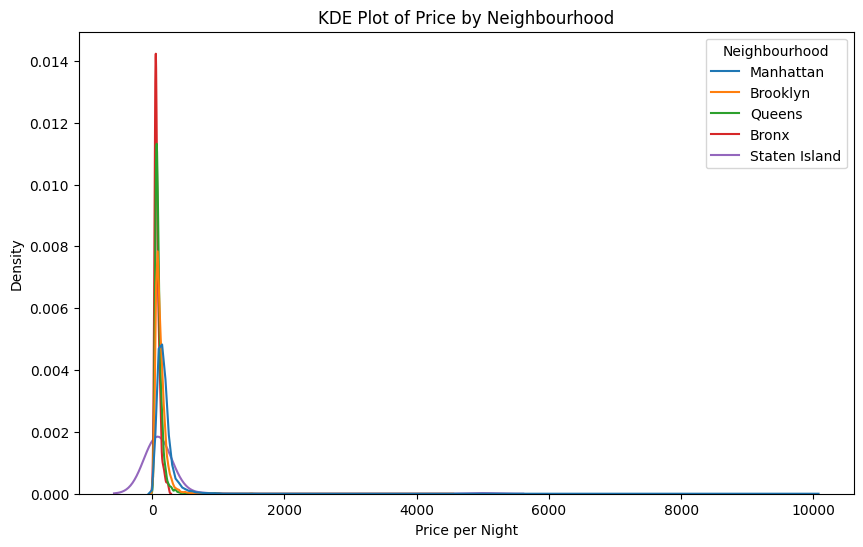

In [54]:
# KDE plot of price grouped by Neighbourhood
plt.figure(figsize = (10, 6))
sns.kdeplot(data = df, x = 'Price', hue = 'Neighbourhood', common_norm = False)
plt.xlabel('Price per Night')
plt.title('KDE Plot of Price by Neighbourhood')
plt.show()

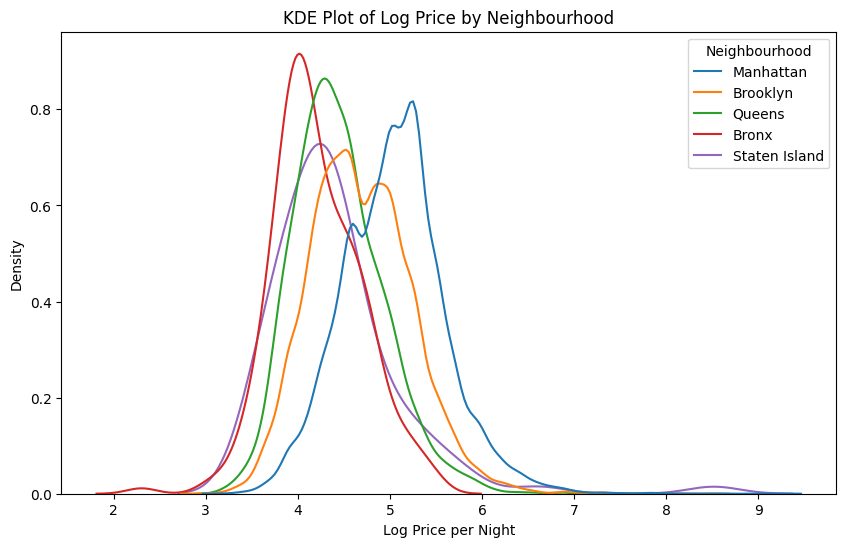

In [5]:
# KDE plot of log price grouped by Neighbourhood
df['log_price'] = np.log(df['Price'])

plt.figure(figsize = (10, 6))
sns.kdeplot(data = df, x = 'log_price', hue = 'Neighbourhood', common_norm = False)
plt.xlabel('Log Price per Night')
plt.title('KDE Plot of Log Price by Neighbourhood')
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. 

    What pattern do you see?

    - The coefficients from the regression match the average price for each Neighbourhood perfectly. This tells us that when we regress Price on one-hot-encoded Neighbourhood dummies without an intercept, the model assigns each neighbourhood to its own mean price.

    What are the coefficients in a regression of a continuous variable on one categorical variable?

    -   Each coefficient equals the mean of the continuous variable within that category.

In [55]:
# Target variable
y = df['Price']

# Neighbourhood dummy
X_nb = pd.get_dummies(df['Neighbourhood'], dtype = float)

# Regression with no intercept
reg_nb = LinearRegression(fit_intercept = False).fit(X_nb, y)

# Get coefficients
results_nb = pd.DataFrame({'Neighbourhood': reg_nb.feature_names_in_, 'Coefficient': reg_nb.coef_})
print('R-squared:', reg_nb.score(X_nb, y))
print(results_nb)

R-squared: 0.04631389606035197
   Neighbourhood  Coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


3. Repeat part 2, but leave an intercept in the linear model. 
   
   How do you have to handle the creation of the dummies differently? 
   
   - Because we kept the intercept, I had to drop one of the categories to avoid perfect multicollinearity.

   What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

   - The intercept is the mean price of the dropped category (Bronx).
   - Each coefficient is the difference between the mean price of the dropped category (the Bronx) and the mean price of the category of the coefficient.
   - To get the coefficients from part 2, add the intercept to the coefficients from part 3.

In [56]:
X_nb_int = pd.get_dummies(df['Neighbourhood'], drop_first = True, dtype = float)
reg_nb_int = LinearRegression(fit_intercept = True).fit(X_nb_int, y)

# Get intercept and coefficients
intercept = reg_nb_int.intercept_
coef = reg_nb_int.coef_

dummy_names = X_nb_int.columns
results_nb_int = pd.DataFrame({'Neighbourhood': dummy_names, 'Coefficient': coef})
print('Intercept:', intercept)
print(results_nb_int)

Intercept: 75.27649769584667
   Neighbourhood  Coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? 

    What is the most expensive Neighbourhoodd?

    - Manhattan is the most expensive Neighbourhood.

In [57]:
# Split sample 80/20 into a training and test set
train, test = train_test_split(df, test_size = 0.2, random_state = 123)

# Training set matrix
X_train = train[['Review Scores Rating', 'Neighbourhood']].copy()
X_train = pd.get_dummies(X_train, drop_first = True, dtype = float)
y_train = train['Price']

# Test set matrix
X_test = test[['Review Scores Rating', 'Neighbourhood']].copy()
X_test = pd.get_dummies(X_test, drop_first = True, dtype = float)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_test = test['Price']

# Fit linear regression
reg = LinearRegression().fit(X_train, y_train)

# Compute R-squared on test set
r2_test = reg.score(X_test, y_test)

# Compute RMSE on test set
y_pred = reg.predict(X_test)
rmse_test = np.sqrt(np.mean((y_test - y_pred) ** 2))

print('R-squared on test set:', r2_test)
print('RMSE on test set:', rmse_test)

# Coefficients df
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': reg.coef_})
print(coef_df)

# Get coefficient on Review Scores Rating
review_coef = coef_df.loc[coef_df['Variable'] == 'Review Scores Rating', 'Coefficient'].values[0]
print('Coefficient on Review Scores Rating:', review_coef)

# Get intercept
intercept = reg.intercept_
print('Intercept:', intercept)

# Determine most expensive neighbourhood:
neigh_cols = [col for col in X_train.columns if col.startswith('Neighbourhood_')]
neigh_means = {}
for col in neigh_cols:
    neigh = col.replace('Neighbourhood_', '')
    neigh_means[neigh] = intercept + coef_df.loc[coef_df['Variable'] == col, 'Coefficient'].values[0]
neigh_means["Base Neighbourhood"] = intercept

most_expensive_neigh = max(neigh_means, key=neigh_means.get)
print('Most expensive neighbourhood:', most_expensive_neigh)


R-squared on test set: 0.03953256032941743
RMSE on test set: 131.3987732306601
                      Variable  Coefficient
0         Review Scores Rating     1.200211
1       Neighbourhood_Brooklyn    51.490259
2      Neighbourhood_Manhattan   109.495005
3         Neighbourhood_Queens    20.970804
4  Neighbourhood_Staten Island    23.480513
Coefficient on Review Scores Rating: 1.2002112594922874
Intercept: -34.47992186986818
Most expensive neighbourhood: Manhattan


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [15]:
train, test = train_test_split(df, test_size = 0.2, random_state = 123)

X_train = train[['Review Scores Rating', 'Neighbourhood', 'Property Type']].copy()
X_train = pd.get_dummies(X_train, drop_first = True, dtype = float)
y_train = train['Price']

X_test = test[['Review Scores Rating', 'Neighbourhood', 'Property Type']].copy()
X_test = pd.get_dummies(X_test, drop_first = True, dtype = float)
X_test = X_test.reindex(columns = X_train.columns, fill_value = 0)
y_test = test['Price']

reg = LinearRegression().fit(X_train, y_train)

r2_test = reg.score(X_test, y_test)
y_pred = reg.predict(X_test)
rmse_test = np.sqrt(np.mean((y_test - y_pred) ** 2))

print('Test R-squared:', r2_test)
print('Test RMSE:', rmse_test)

coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': reg.coef_})
print(coef_df)

review_coef = coef_df.loc[coef_df['Variable'] == 'Review Scores Rating', 'Coefficient'].values[0]
print('Coefficient on Review Scores Rating:', review_coef)

intercept = reg.intercept_
property_cols = [col for col in X_train.columns if col.startswith('Property Type_')]
prop_means = {}

for col in property_cols:
    prop_type = col.replace('Property Type_', '')
    prop_means[prop_type] = intercept + coef_df.loc[coef_df['Variable'] == col, 'Coefficient'].values[0]

prop_means["Base Property Type"] = intercept

most_expensive_property = max(prop_means, key = prop_means.get)
print('Most expensive property type:', most_expensive_property)

Test R-squared: 0.0447843523091509
Test RMSE: 131.0390395671991
                         Variable  Coefficient
0            Review Scores Rating     1.190458
1          Neighbourhood_Brooklyn    59.238922
2         Neighbourhood_Manhattan   122.711851
3            Neighbourhood_Queens    26.802029
4     Neighbourhood_Staten Island    16.175776
5   Property Type_Bed & Breakfast   -33.824462
6              Property Type_Boat    61.940402
7          Property Type_Bungalow    56.697552
8             Property Type_Cabin    59.184677
9         Property Type_Camper/RV   -19.764637
10           Property Type_Chalet   -29.532852
11      Property Type_Condominium    81.555084
12             Property Type_Dorm   -45.971603
13            Property Type_House    35.792265
14       Property Type_Lighthouse   -90.723310
15             Property Type_Loft    65.427371
16            Property Type_Other    -1.649866
17        Property Type_Townhouse    85.594938
18        Property Type_Treehouse     9.516

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

If Review Scores Rating chanes from part 4 to 5, it's because in part 5, we included Property Type as an additional variable. In multiple regression, each coefficient reflects the effect of that variable while holding all other variables constant.

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.


In [23]:
# Load data
df = pd.read_csv('./data/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [24]:
# Drop unnamed column 0
df = df.drop(columns = [df.columns[0]])

# Transform skewed numeric variables
df['Price_asinh'] = np.arcsinh(df['Price'])
df['Mileage_asinh'] = np.arcsinh(df['Mileage_Run'])

df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Price_asinh,Mileage_asinh
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000,14.088586,11.398883
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000,14.125932,10.611770
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000,14.276726,10.986648
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000,13.626768,11.175493
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000,13.845069,10.824806


  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

  - Mean car price is around 741,000, with most cars falling between 475,000 and 880,000.
  - The distribution is right-skewed, with a few outliers above 2 million.
  - The price KDE plot has a peak around 500,000 to 700,000 and a long tail stretching out.
  - MG Motors, Kia, Jeep, and Skoda have the highest average prices, all above 1 million.
  - Datsun, Chevrolet, and Maruti Suzuki have the lowest average prices, averaging under 600,000.
  - The grouped KDE plot by brand also shows MG Motors and Kia shifted to the right, showing their higher price distributions.


In [33]:
# Summary stats for price
df['Price'].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

In [30]:
# Summary stats for price by brand
df.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


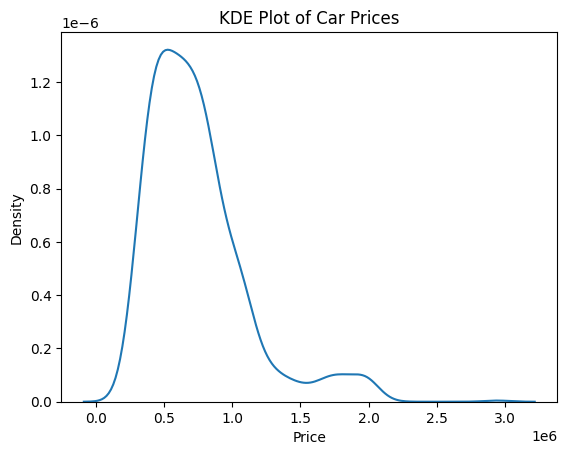

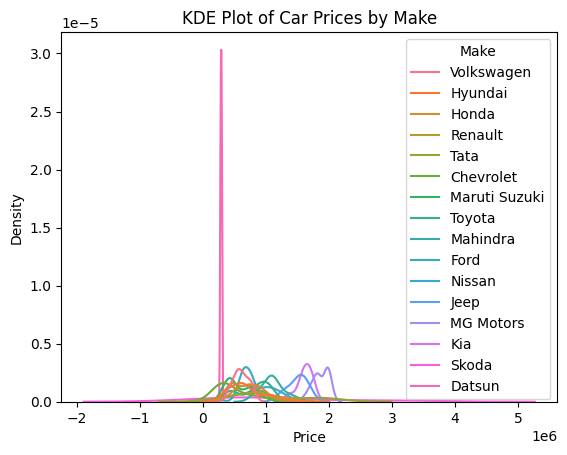

In [32]:
# KDE plot of price
sns.kdeplot(data = df, x = 'Price', common_norm = False)
plt.title('KDE Plot of Car Prices')
plt.show()

# KDE plot of price by make
sns.kdeplot(data = df, x = 'Price', hue = 'Make', common_norm = False)
plt.title('KDE Plot of Car Prices by Make')
plt.show()

  3. Split the data into an 80% training set and a 20% testing set.


In [34]:
train, test = train_test_split(df, test_size = 0.2, random_state = 123)

  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

  - The joint model performs best, with the highest $R^2$ and lowest RMSE on the test set.


In [37]:
# Define target variable
y_train = train['Price_asinh']
y_test = test['Price_asinh']

# Model 1: Numeric variables only
numeric_vars = ['Mileage_asinh', 'Seating_Capacity', 'Make_Year']
X_train_1 = train[numeric_vars]
X_test_1 = test[numeric_vars]

reg_1 = LinearRegression().fit(X_train_1, y_train)

r2_train_1 = reg_1.score(X_train_1, y_train)
r2_test_1 = reg_1.score(X_test_1, y_test)
rmse_train_1 = np.sqrt(np.mean((y_train - reg_1.predict(X_train_1)) ** 2))
rmse_test_1 = np.sqrt(np.mean((y_test - reg_1.predict(X_test_1)) ** 2))

# Model 2: Categorical variables (one-hot encoded)
cat_vars = ['Make', 'Body_Type', 'Fuel_Type', 'Transmission_Type']
X_train_2 = pd.get_dummies(train[cat_vars], drop_first = True, dtype = float)
X_test_2 = pd.get_dummies(test[cat_vars], drop_first = True, dtype = float)
X_test_2 = X_test_2.reindex(columns = X_train_2.columns, fill_value = 0)

reg_2 = LinearRegression().fit(X_train_2, y_train)

r2_train_2 = reg_2.score(X_train_2, y_train)
r2_test_2 = reg_2.score(X_test_2, y_test)
rmse_train_2 = np.sqrt(np.mean((y_train - reg_2.predict(X_train_2)) ** 2))
rmse_test_2 = np.sqrt(np.mean((y_test - reg_2.predict(X_test_2)) ** 2))

# Model 3: All variables together
X_train_3 = pd.concat([X_train_1, X_train_2], axis = 1)
X_test_3 = pd.concat([X_test_1, X_test_2], axis = 1)

reg_3 = LinearRegression().fit(X_train_3, y_train)

r2_train_3 = reg_3.score(X_train_3, y_train)
r2_test_3 = reg_3.score(X_test_3, y_test)
rmse_train_3 = np.sqrt(np.mean((y_train - reg_3.predict(X_train_3)) ** 2))
rmse_test_3 = np.sqrt(np.mean((y_test - reg_3.predict(X_test_3)) ** 2))

# Results
print('Model 1 (Numeric Only):')
print('  Train R-squared:', r2_train_1, '  Test R-squared:', r2_test_1)
print('  Train RMSE:', rmse_train_1, '  Test RMSE:', rmse_test_1)

print('Model 2 (Categorical Only):')
print('  Train R-squared:', r2_train_2, '  Test R-squared:', r2_test_2)
print('  Train RMSE:', rmse_train_2, '  Test RMSE:', rmse_test_2)

print('Model 3 (All Variables):')
print('  Train R-squared:', r2_train_3, '  Test R-squared:', r2_test_3)
print('  Train RMSE:', rmse_train_3, '  Test RMSE:', rmse_test_3)

Model 1 (Numeric Only):
  Train R-squared: 0.4169696210958407   Test R-squared: 0.4365137897643878
  Train RMSE: 0.35030448959134336   Test RMSE: 0.3094437103718596
Model 2 (Categorical Only):
  Train R-squared: 0.6295429325789211   Test R-squared: 0.5474710898736295
  Train RMSE: 0.2792344859859977   Test RMSE: 0.27730849794417284
Model 3 (All Variables):
  Train R-squared: 0.8181104000947955   Test R-squared: 0.7959048036695535
  Train RMSE: 0.1956608991798298   Test RMSE: 0.186232899607892


  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  
  - The best polynomial model is at degree 2, where $R^2$ = 0.439 and RMSE = 0.309.
  - After degree 2, test performance drops a lot, while training performance continues to improve.
  - Although polunomial features slightly improved the numeric-only model, the joint model still performs best.
  - $R^2$ never went negatice on the test set.


In [44]:
X_train_num = train[numeric_vars]
X_test_num = test[numeric_vars]

for d in range(1, 7):
    poly = PolynomialFeatures(degree = d, include_bias = False)
    X_train_poly = poly.fit_transform(X_train_num)
    X_test_poly = poly.transform(X_test_num)

    reg_poly = LinearRegression().fit(X_train_poly, y_train)

    r2_train = reg_poly.score(X_train_poly, y_train)
    r2_test = reg_poly.score(X_test_poly, y_test)

    rmse_train = np.sqrt(np.mean((y_train - reg_poly.predict(X_train_poly)) ** 2))
    rmse_test = np.sqrt(np.mean((y_test - reg_poly.predict(X_test_poly)) ** 2))

    print(f'Degree {d}:')
    print('  Train R-squared:', r2_train, '  Test R-squared:', r2_test)
    print('  Train RMSE:', rmse_train, '  Test RMSE:', rmse_test)

Degree 1:
  Train R-squared: 0.41696962109584046   Test R-squared: 0.4365137897643909
  Train RMSE: 0.35030448959134347   Test RMSE: 0.30944371037185875
Degree 2:
  Train R-squared: 0.44696316006963865   Test R-squared: 0.4389018870342939
  Train RMSE: 0.3411749545491833   Test RMSE: 0.30878729119502385
Degree 3:
  Train R-squared: 0.4501742480758202   Test R-squared: 0.4300611770529156
  Train RMSE: 0.3401830335625455   Test RMSE: 0.31121042324876735
Degree 4:
  Train R-squared: 0.4536848056876297   Test R-squared: 0.23691989841750793
  Train RMSE: 0.33909528485910306   Test RMSE: 0.36010162241987925
Degree 5:
  Train R-squared: 0.4537180344367595   Test R-squared: 0.23731386837756807
  Train RMSE: 0.339084972237736   Test RMSE: 0.3600086521421713
Degree 6:
  Train R-squared: 0.4537512676085007   Test R-squared: 0.23710984913106625
  Train RMSE: 0.3390746579300901   Test RMSE: 0.36005680024638975


  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  
  - Yes, the predicted values line up closely with the true values along the diagonal line in the scatterplot. This shows that the model captures the overall pattern in the data.
  - The residual KDE plot shows a roughly bell-shaped distribution centered around zero. (The mean residual is about 0.017 which is very close to 0)
  - The strengths of the model are that is captures both numeric and categorical effects and residuals are centered approximately normal.
  - Weaknesses are slight underfitting in extreme price ranges and the model may miss more complex, non-linear interactions between variables.

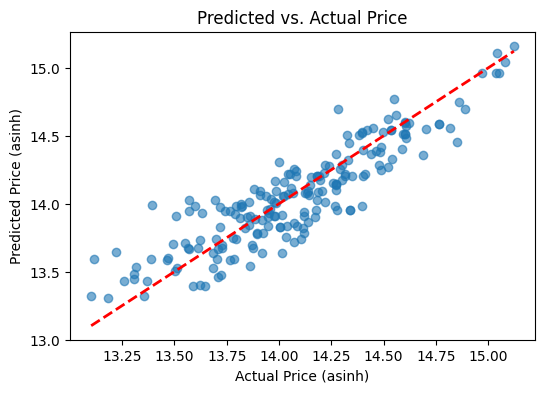

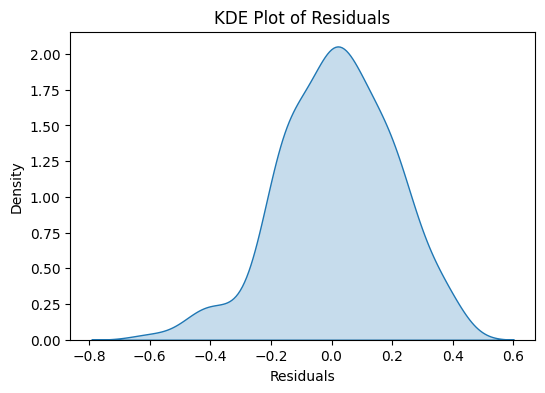

Mean residuals: 0.017013075025709083
Standard deviation of residuals: 0.18592908273370534


In [49]:
# Predicted values from model 3
y_pred_best = reg_3.predict(X_test_3)

# Plot of predicted vs. actual values
plt.figure(figsize = (6, 4))
plt.scatter(y_test, y_pred_best, alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw = 2, color = 'red')
plt.xlabel('Actual Price (asinh)')
plt.ylabel('Predicted Price (asinh)')
plt.title('Predicted vs. Actual Price')
plt.show()

# Compute residuals and KDE plot
residuals = y_test - y_pred_best
plt.figure(figsize = (6, 4))
sns.kdeplot(residuals, fill = True)
plt.xlabel('Residuals')
plt.title('KDE Plot of Residuals')
plt.show()

print('Mean residuals:', residuals.mean())
print('Standard deviation of residuals:', residuals.std())


**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
